In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

In [2]:
data = pd.read_csv(r"C:\ExcelR Data\Assignments\Assignment 5 Multilinear Regression\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.drop(columns=['State'],inplace=True)

In [5]:
data.shape

(50, 4)

In [6]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


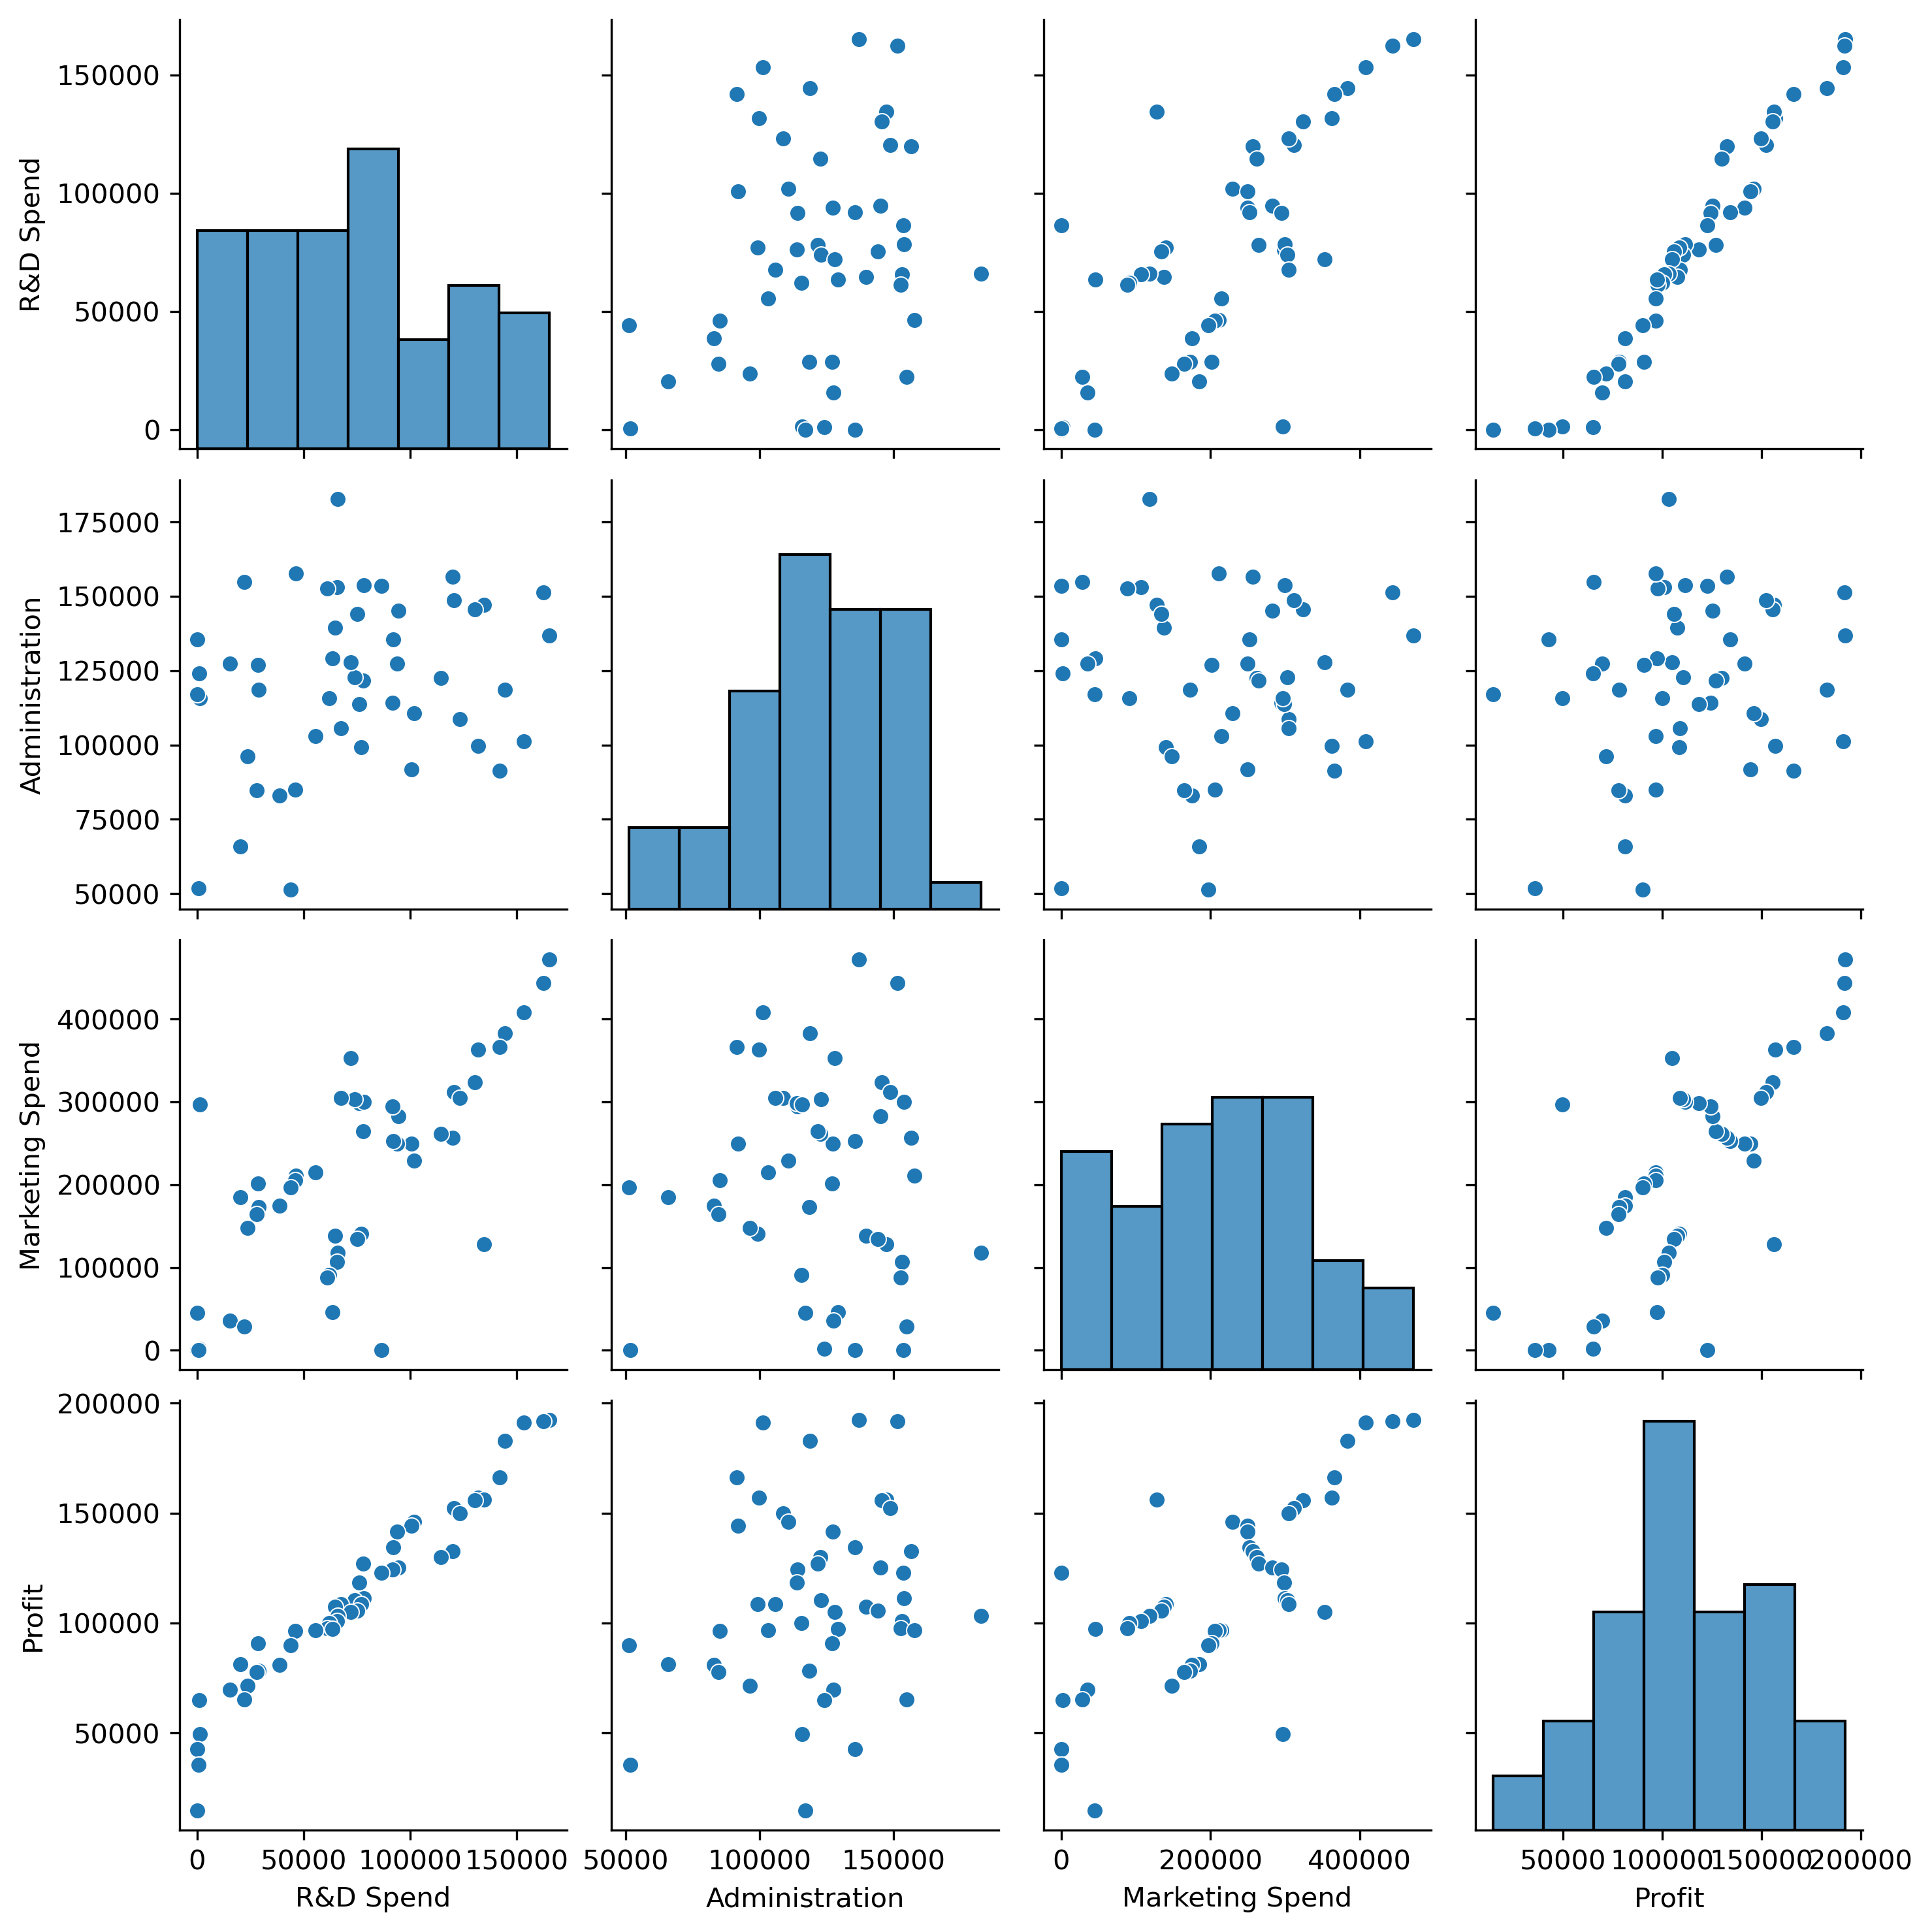

In [10]:
sns.pairplot(data)

In [11]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

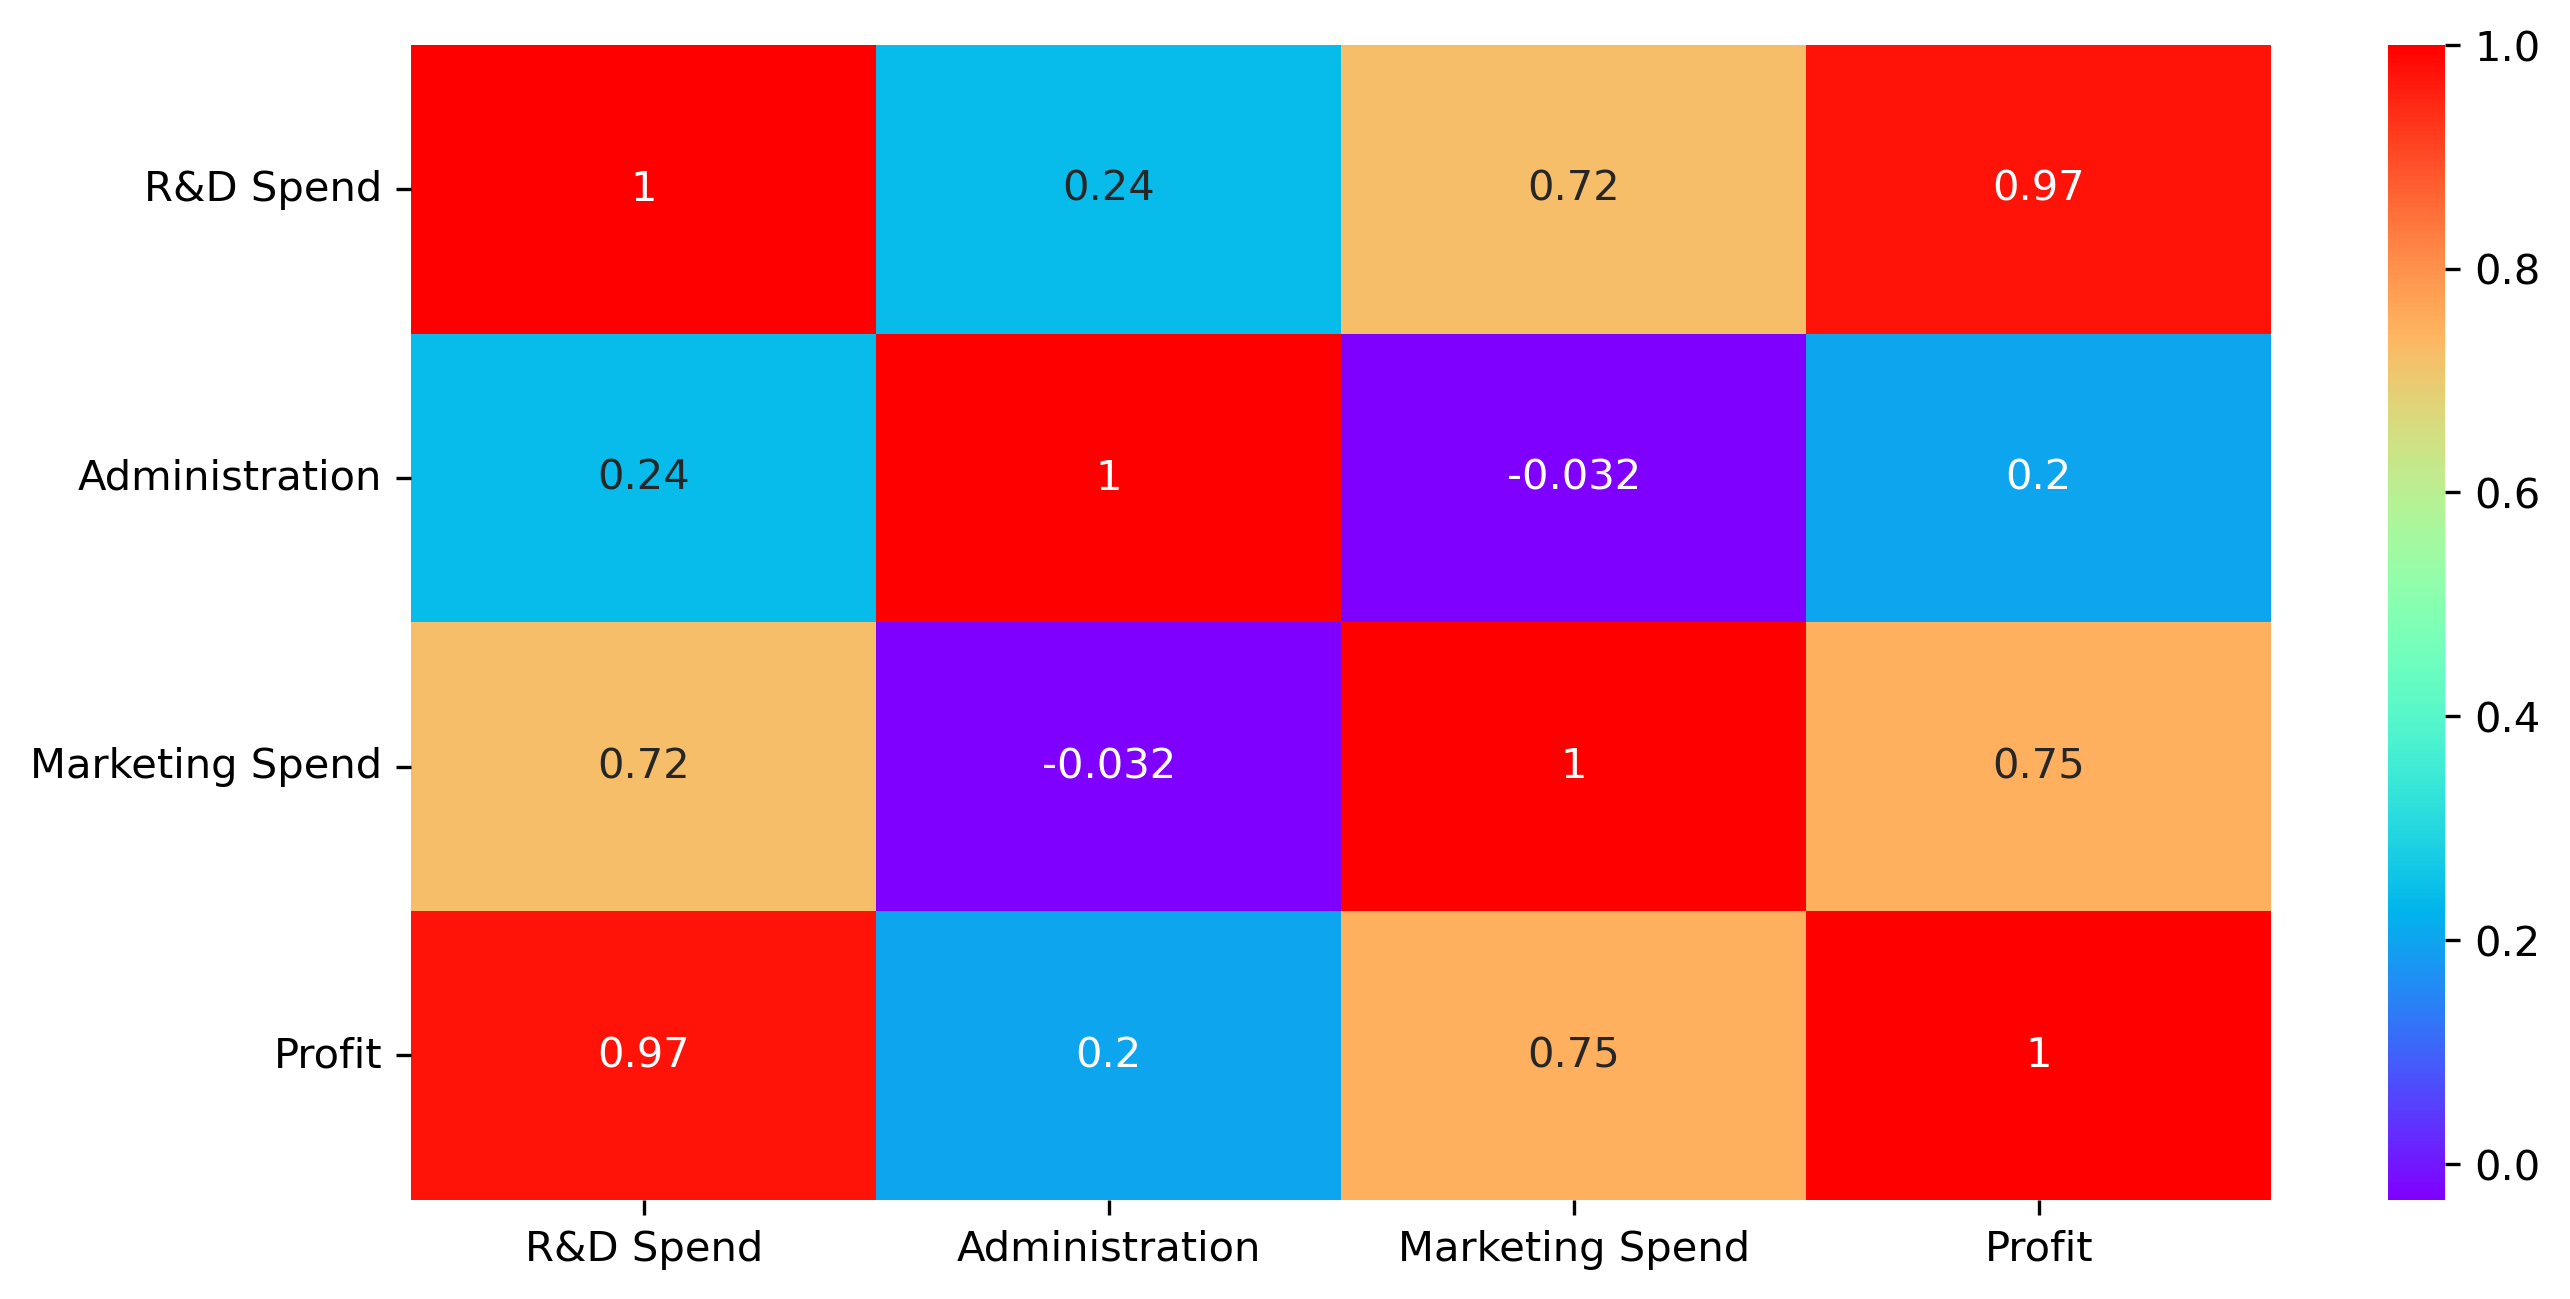

In [12]:
sns.heatmap(data.corr(),annot=True, cmap='rainbow')

# Model Building

In [13]:
data.rename(columns={'Marketing Spend':'marketing_spend','R&D Spend':'rnd_spend'}, inplace=True)

In [14]:
data.head(1)

,rnd_spend,Administration,marketing_spend,Profit
0,165349.2,136897.8,471784.1,192261.83


In [15]:
model = smf.ols('Profit~rnd_spend+Administration+marketing_spend', data=data).fit()

In [16]:
model.params

Intercept          50122.192990
rnd_spend              0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 30 May 2023   Prob (F-statistic):           4.53e-30
Time:                        18:29:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
m_admin = smf.ols('Profit~Administration',data=data).fit()

In [19]:
m_admin.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [20]:
m_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.162
Time:                        18:29:46   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
m_mktg = smf.ols('Profit~marketing_spend', data=data).fit()

In [22]:
m_mktg.params

Intercept          60003.548816
marketing_spend        0.246459
dtype: float64

In [23]:
m_mktg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 30 May 2023   Prob (F-statistic):           4.38e-10
Time:                        18:29:46   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
m_mktg_admin = smf.ols('Profit~marketing_spend+Administration',data=data).fit()

In [25]:
m_mktg_admin.params

Intercept          20224.429059
marketing_spend        0.248844
Administration         0.323673
dtype: float64

In [26]:
m_mktg_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 30 May 2023   Prob (F-statistic):           2.50e-10
Time:                        18:29:46   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
data.columns

Index(['rnd_spend', 'Administration', 'marketing_spend', 'Profit'], dtype='object')

In [28]:
r_rnd = smf.ols('rnd_spend~Administration+marketing_spend',data=data).fit().rsquared
vif_rnd = 1/(1-r_rnd)

r_admin = smf.ols('Administration~rnd_spend+marketing_spend',data=data).fit().rsquared
vif_admin = 1/(1-r_admin)

r_mktg = smf.ols('marketing_spend~rnd_spend+Administration',data=data).fit().rsquared
vif_mktg = 1/(1-r_mktg)

d1 = {'Variables':['rnd_spend','Administration','marketing_spend'],
   'VIF':[vif_rnd,vif_admin,vif_mktg]}
vif_data = pd.DataFrame(d1)
vif_data

,Variables,VIF
0,rnd_spend,2.468903
1,Administration,1.175091
2,marketing_spend,2.326773


In [29]:
#Influence Plot
import statsmodels.api as sm

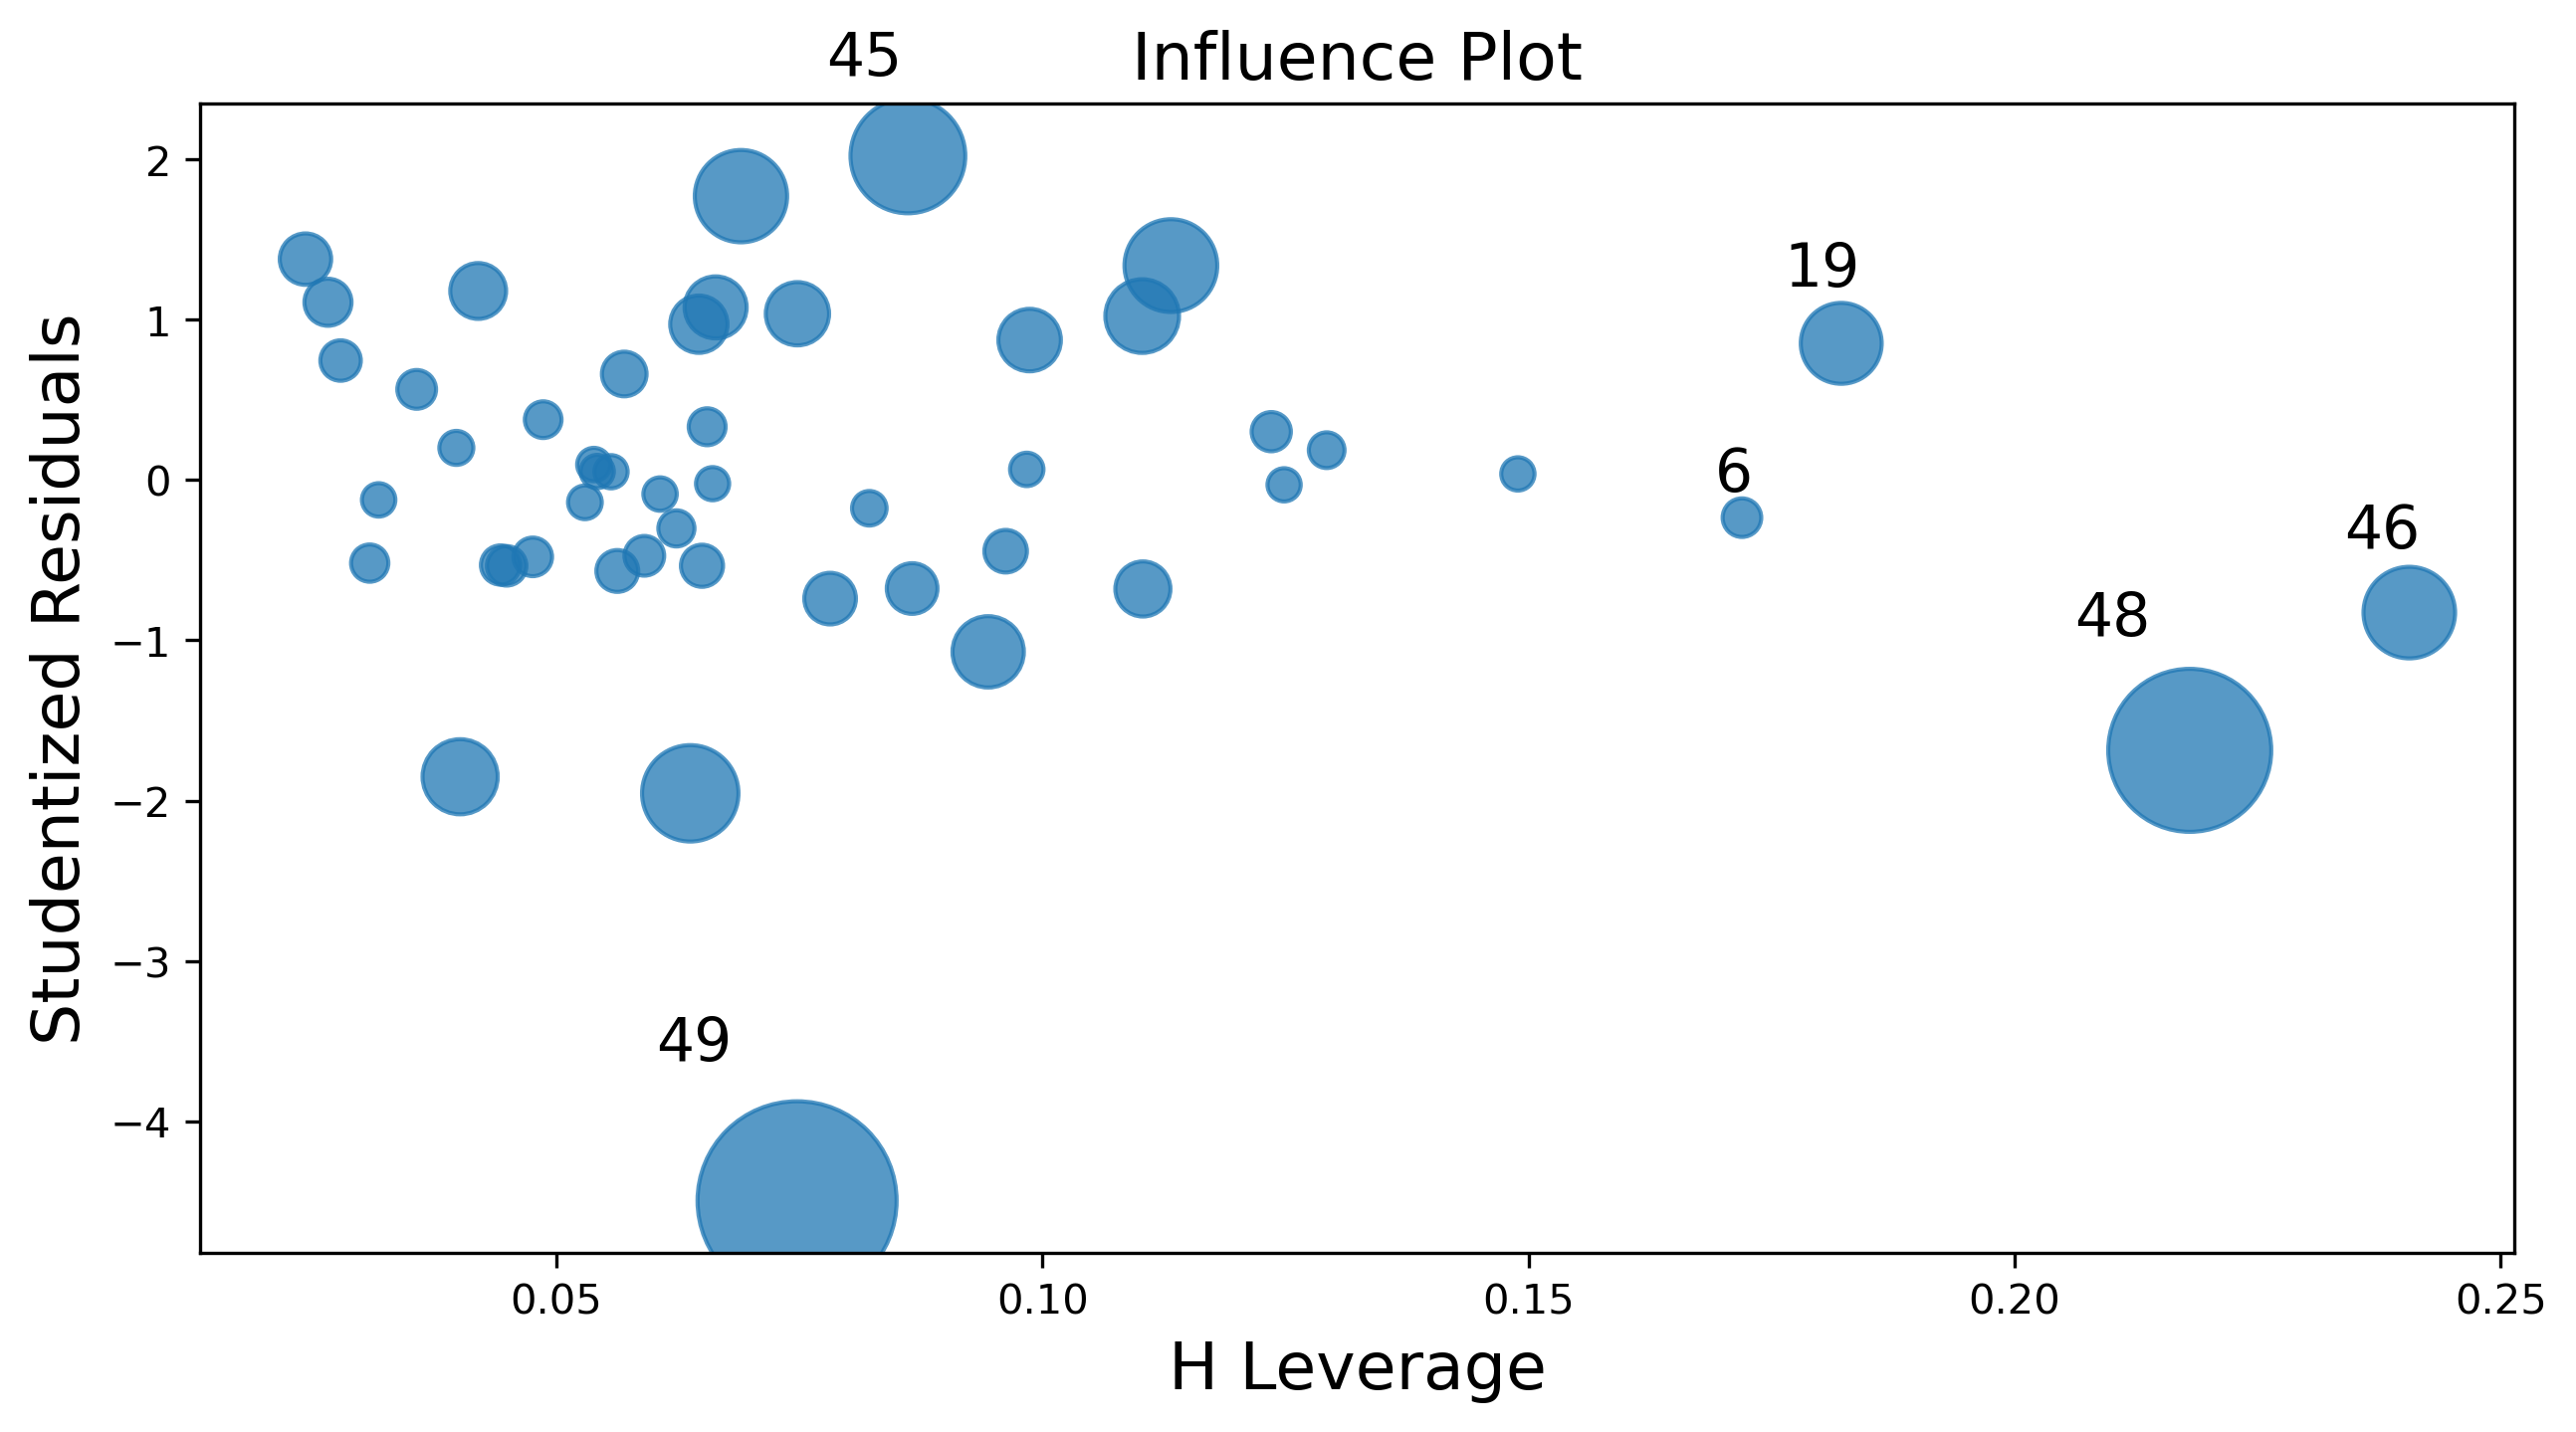

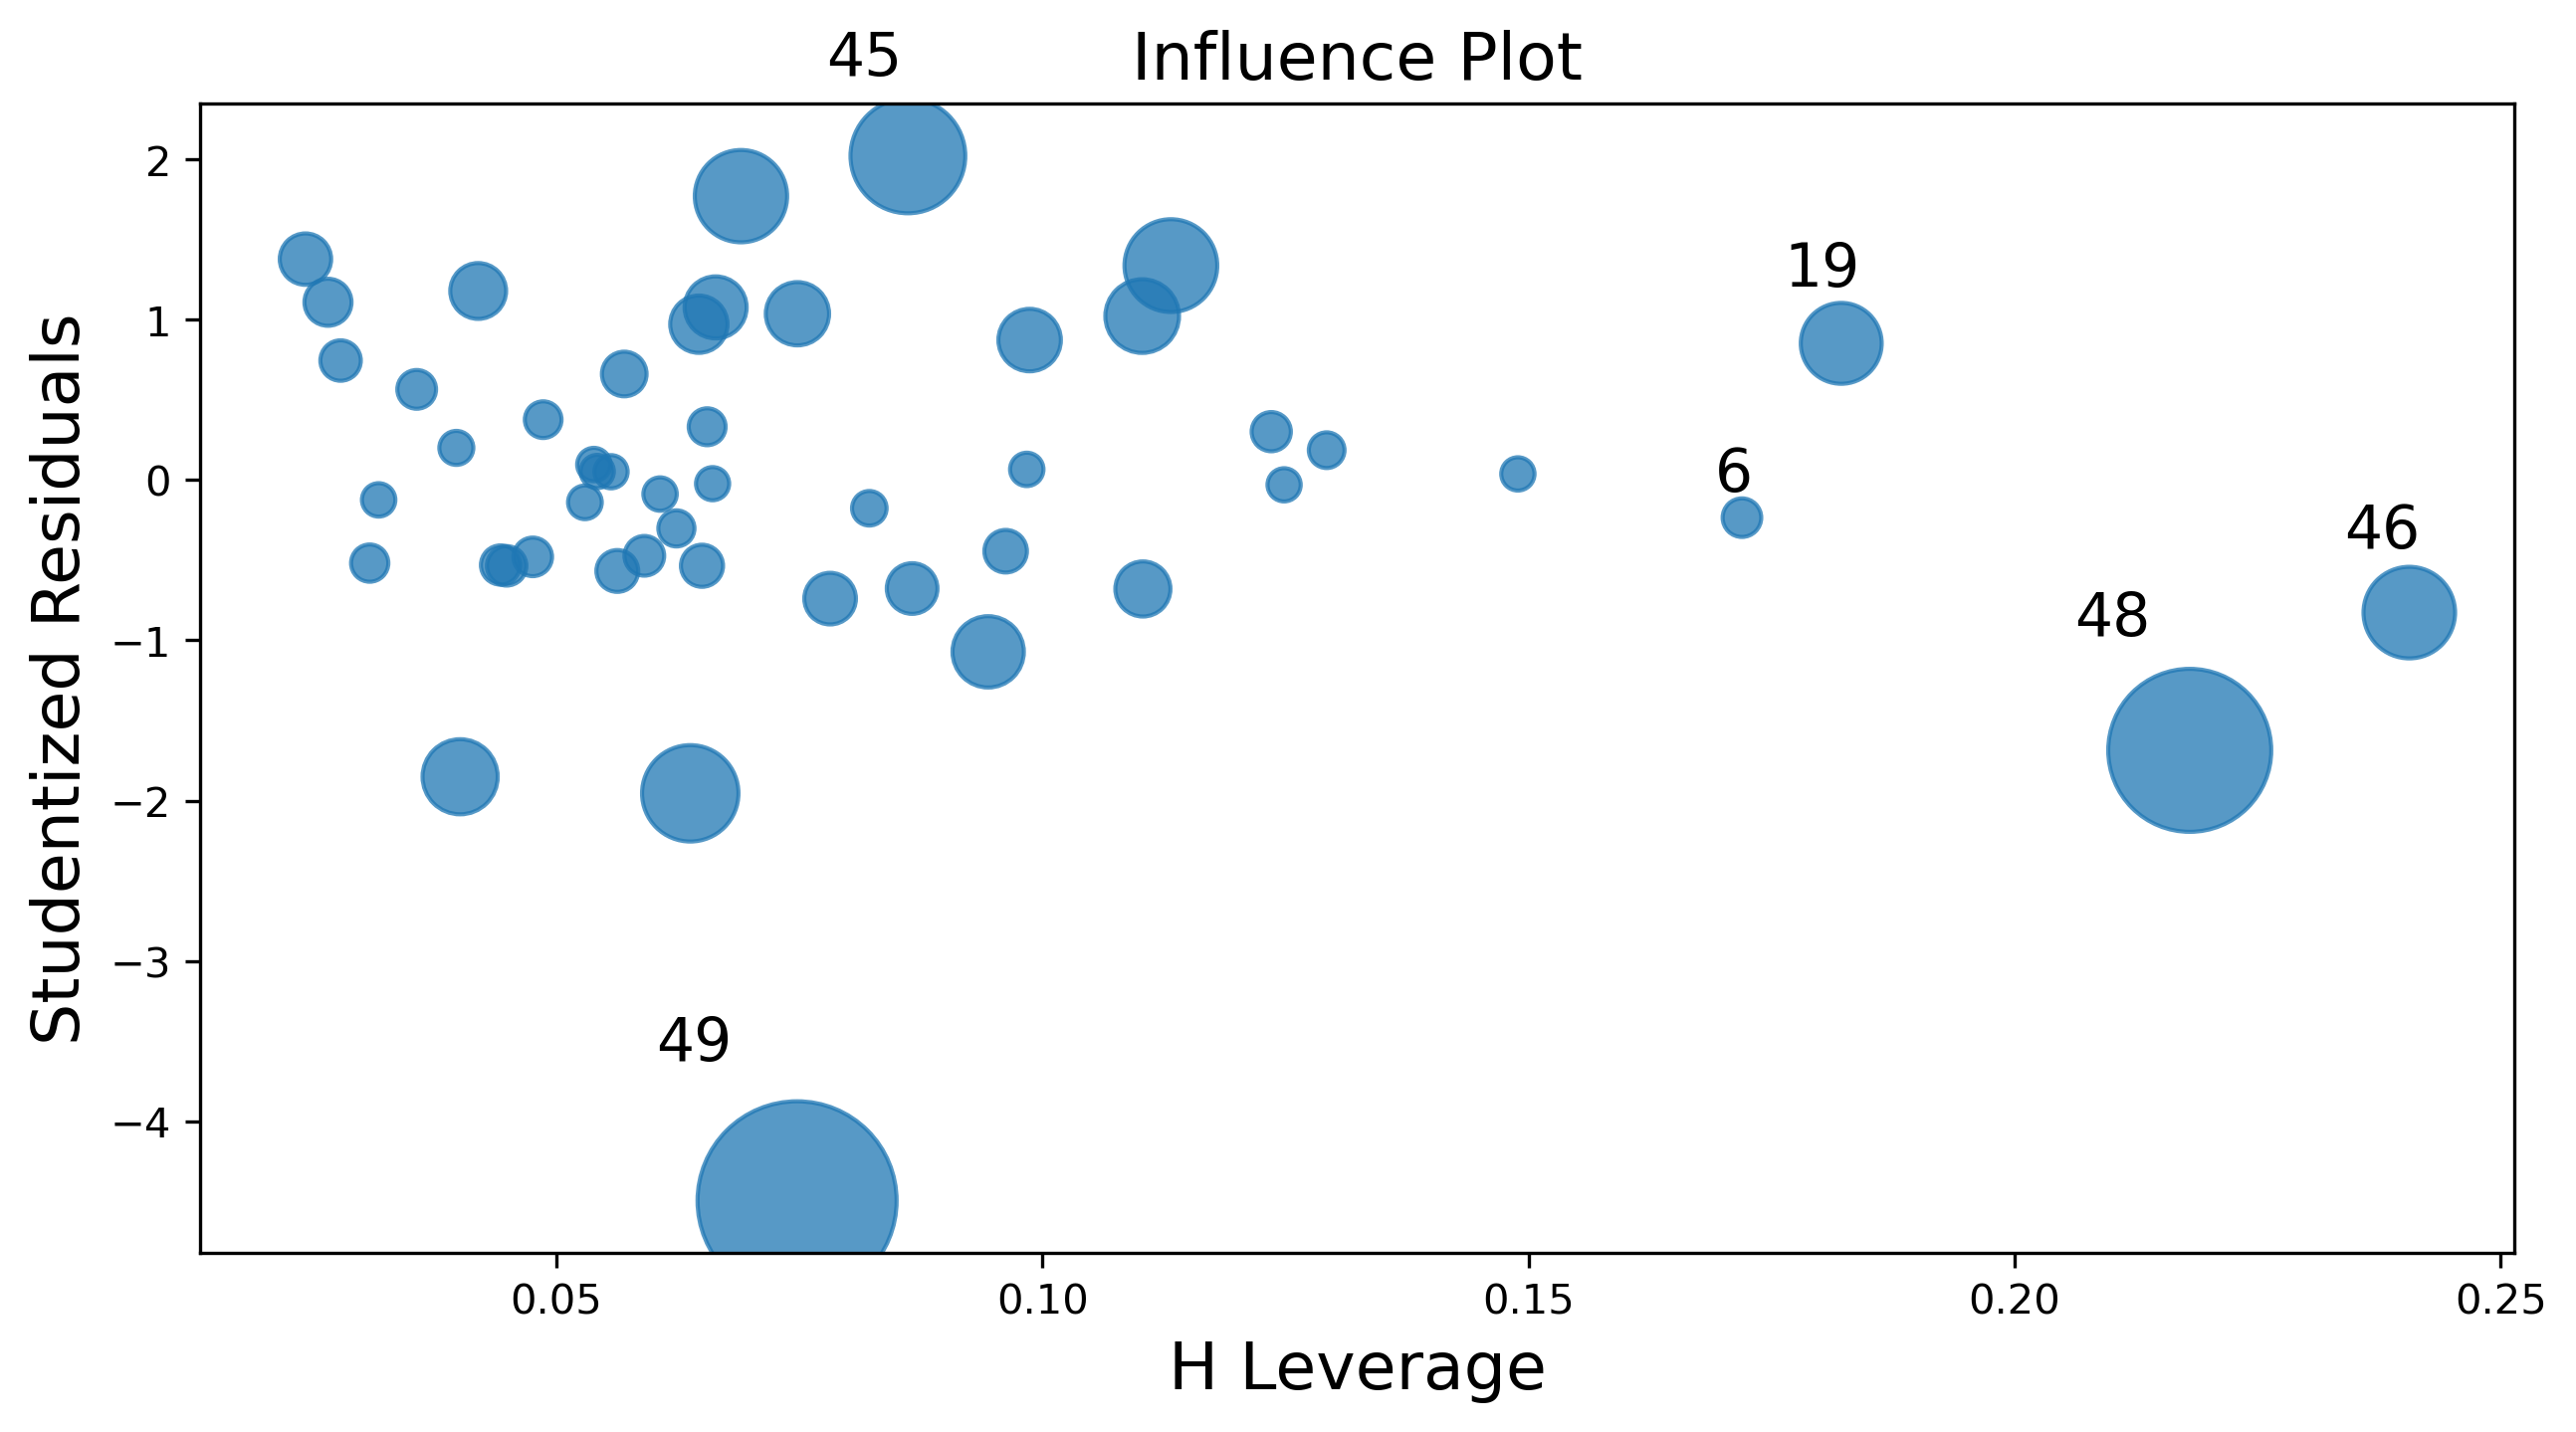

In [30]:
sm.graphics.influence_plot(model)

In [31]:
data1= data.drop(data.index[[49]],axis=0)

In [32]:
m1=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=data1).fit()

In [33]:
m1.params

Intercept          52382.439251
rnd_spend              0.783002
Administration        -0.022201
marketing_spend        0.025234
dtype: float64

In [34]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 30 May 2023   Prob (F-statistic):           8.85e-32
Time:                        18:29:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rnd_spend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
data2= data.drop(data.index[[49,46,48]],axis=0)

In [36]:
m2=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=data2).fit()

In [37]:
m2.params

Intercept          58228.661466
rnd_spend              0.764210
Administration        -0.053193
marketing_spend        0.025087
dtype: float64

In [38]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Tue, 30 May 2023   Prob (F-statistic):           2.12e-30
Time:                        18:29:51   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
rnd_spend           0.7642      0.041     18.704      0.000       0.682       0.847
Administration     -0.0532      0.044     -1.202      0.236      -0.142       0.036
marketing_spend     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
data3= data.drop(data.index[[19,49,46,48]],axis=0)

In [40]:
m3=smf.ols('Profit~rnd_spend+Administration+marketing_spend',data=data3).fit()

In [41]:
m3.params

Intercept          57647.195196
rnd_spend              0.749272
Administration        -0.052558
marketing_spend        0.031968
dtype: float64

In [42]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     357.8
Date:                Tue, 30 May 2023   Prob (F-statistic):           6.40e-30
Time:                        18:29:51   Log-Likelihood:                -472.28
No. Observations:                  46   AIC:                             952.6
Df Residuals:                      42   BIC:                             959.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.765e+04   5928.026      9.725      0.000    4.57e+04    6.96e+04
rnd_spend           0.7493      0.043     17.294      0.000       0.662       0.837
Administration     -0.0526      0.044     -1.189      0.241      -0.142       0.037
marketing_spend     0.0320      0.016      1.971      0.055      -0.001       0.065
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.547
Skew:                           0.063   Prob(JB):                        0.761
Kurtosis:                       2.481   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting for new record

In [43]:
data.head()

,rnd_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [44]:
newdata = pd.DataFrame({
    'rnd_spend':[158492.22,179446.48,123358.00],
    'Administration':[95437.0,116428.78,138746.20],
    'marketing_spend':[510760.11,444824.99,354629.75]
})

In [45]:
newdata

,rnd_spend,Administration,marketing_spend
0,158492.22,95437.00,510760.11
1,179446.48,116428.78,444824.99
2,123358.00,138746.20,354629.75


In [46]:
Profit1 = model.predict(newdata)

In [47]:
Profit1

0    189169.533735
1    203694.495748
2    155448.858217
dtype: float64